# **MLCB - Assignment 3**
## Glykeria Spyrou

Importing all necessary libraries

In [1]:
# import os
import numpy as np
import pandas as pd
import scanpy as sc
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# install kneed, required for custom function
# !pip install kneed

from src.clustering_pipeline import SingleCellPipeline

### *Pre-processing*
<p align="justify">
Prior to completing any of the tasks given, it is essential to pre-process the single-cell RNA-seq data given to us through various steps.
In brief the pre-processing steps involve expression quality control, filtering of low-quality cells, and finally normalization.
An additional task for the pre-processing would be to perform batch corrections.
However, in this case it is inapplicable since we only have expression data in our hands.

For the complition of the tasks mentioned above the package of <code>scanpy</code> will be used, which is the most popular alternative to the <code>Seurat</code> R package.


As a first step we are going to load the CSV file containing the single-cell RNA-seq data.
</p>

In [2]:
# Load dataset
scrnaseq_data = pd.read_csv("./data/RNA-seq.csv")

# Print the head of the dataset
scrnaseq_data.head()

,cells,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,cell_84,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,cell_85,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,cell_87,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,cell_90,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,cell_91,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [3]:
# Format the DataFrame and index based on cell names
scrnaseq_data.set_index('cells', inplace=True)

# Change index name
scrnaseq_data.index.name = 'cells'

In [4]:
scrnaseq_data

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
cells,,,,,,,,,,,,,,,,,,,,,
cell_84,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
cell_85,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
cell_87,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
cell_90,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
cell_91,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,3.368243,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_230,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,8.015534,4.126711,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
cell_233,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,8.248133,3.735215,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
cell_236,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,7.523521,3.718392,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807


##### *Expression QC*
<p align="justify">
Of the initial steps for the inspection of our single-cell data is quality control, which is crucial in order to eliminate bias caused from various factors.
These can be cells of low-quality, genes with low expression and possible doublet cells.
</p>

In [5]:
sc_data = sc.AnnData(scrnaseq_data,
                     scrnaseq_data.index.to_frame(),
                     scrnaseq_data.columns.to_frame())

In [6]:
# Conversion of the DataFrame into AnnData
sc_data = sc.AnnData(scrnaseq_data)
sc_data.var_names = sc_data.var_names.astype(str)

# Mitochondrial genes, "MT-" for human, "Mt-" for mouse
sc_data.var["mt_Hm"] = sc_data.var_names.str.startswith("MT-")
sc_data.var["mt_Mm"] = sc_data.var_names.str.startswith("Mt-")

# Calculate QC metrics
sc.pp.calculate_qc_metrics(sc_data, percent_top=None, log1p=False, inplace=True)

In [7]:
# Check if there are any true values
print(any(sc_data.var["mt_Hm"]))
print(any(sc_data.var["mt_Mm"]))

False
False


<p align="justify">
Given the above "False" output on both checks, indicating that no mitochondrial gene are included.
Additionally, judging by the format of the genes we can conclude that they still have the probe identifiers by Affymetrix.
For this case, probe set annotation should have been performed and probably R environment would have been more appropriate for this task.
However, given the goals of this assignment where no gene-specific interpretation is to be constructed the gene names will remain as they are.
</p>

Perform visual inspection based on the QC metrics.

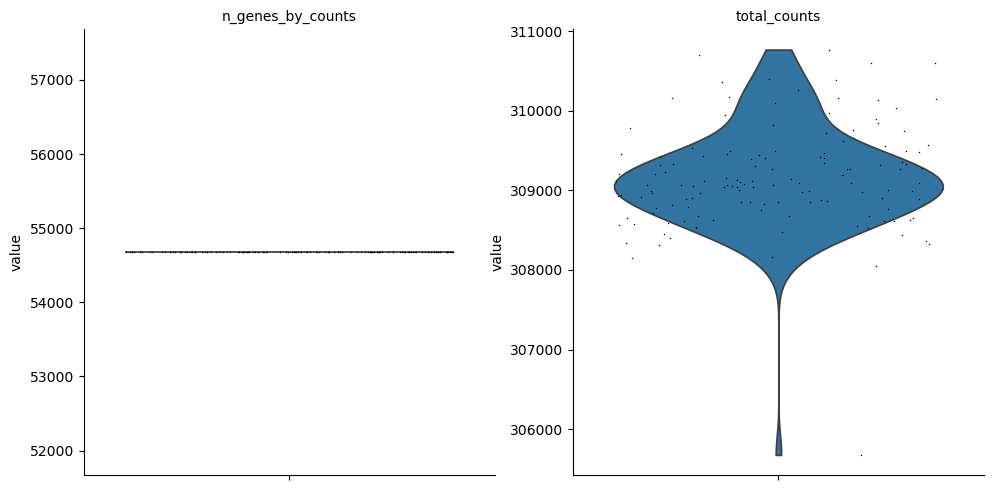

In [8]:
# Generate violin plot
sc.pl.violin(
    sc_data,
    ["n_genes_by_counts", "total_counts"],
    jitter=0.4,
    multi_panel=True,
)

<p align="justify">
The left plot ("n_genes_by_counts") shows the distribution of the number of detected genes across cells, with a really tight distribution indicating consistent gene detection rates.
Therefore, we can verify that this is a pre-processed dataset.

The right plot ("total_counts") shows the distribution of total expression levels (read counts) across cells, with an approximately normal distribution but a wider spread, suggesting more variability in overall expression levels compared to the number of detected genes.
</p>

##### *Filtering*
<p align="justify">
Given the above comments along with the results of the QC plots, the fact that there is no prior information regarding different batches, and the fact that it is unknown based on the given format that any mitochondrial genes exist, the only filtering method we are going to apply is removal of genes that are expressed in less than 10 cells.
</p>

In [9]:
# Calculate the number of cells in which each gene is expressed
sc_data.obs['expressed_cells'] = (sc_data.X > 0).sum(axis=1)

# Filter genes expressed in less than 10 cells
sc_data_filtered = sc_data[sc_data.obs['expressed_cells'] >= 10]

# Remove the 'expressed_cells' column if you no longer need it
sc_data_filtered.obs.drop('expressed_cells', axis=1, inplace=True)

In [10]:
print(sc_data)
print(sc_data_filtered)

AnnData object with n_obs × n_vars = 137 × 54675
    obs: 'n_genes_by_counts', 'total_counts', 'expressed_cells'
    var: 'mt_Hm', 'mt_Mm', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
AnnData object with n_obs × n_vars = 137 × 54675
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'mt_Hm', 'mt_Mm', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'


As seen above, the dimensions of both filtered and unfiltered `AnnData` objects remain the same.
Therefore, probably the given dataset has already been filtered out in cell-level.

##### *Doublet Detection*
<p align="justify">
The step of identifying doublets is a crucial since they have the ability to lead to misclassifications in further downstream analysis steps.
The selected package <code>scanpy</code> already contains an algorithm for doublet detection, which is based on a nearest neighbor classifier.
After running this algorithm, two new elements will be added to <code>sc_data.obs</code> containing doublet scores.
</p>

In [11]:
# Running doublet detector
# Convert the data type of the array to float
sc_data.X = sc_data.X.astype(float)

sc.pp.scrublet(sc_data)

In [12]:
# Create a histogram of doublet scores
fig_hist = px.histogram(sc_data.obs, x="doublet_score", nbins=50, title="Distribution of Doublet Scores")
fig_hist.update_traces(marker_color='#1c59ba')
fig_hist.update_layout(xaxis_title="Doublet Score", yaxis_title="Frequency",
                          title_x=0.5,
                          height=450,
                          width=650,
                          template='simple_white',
                          font=dict(family="Arial", size=15))

# Display the plot
fig_hist.show()

As seen from the histogram above, the vast majority of the cells have a doublet score which is less than the 0.25 threshold, and therefore they are not considered are doublets.

##### *Normalization*
<p align="justify">
Before starting with any of the tasks, one of the most important steps is to normalize our data, in order to account for various forms of technical bias or noise present in the expression data, but most importantly in order to make the samples comparable among them.
There are several techniques to normalize single-cell expression data, where the one proposed in the <code>scanpy</code> documentation follows count depth scaling with subsequent log plus one (log1p) transformation.
However, we won't continue with normalizing the data in order to not change the distribution of the already preprocessed data.
Instead, in the pipeline that will follow standard scaling is being used.
</p>

<p align="justify">
Overall, by the tasks completed above we have verified that the dataset is indeed pre-processed and didn't require any further manipulation.
</p>

### ***TASK 1: Dimensionality Reduction***

#### PCA

<p align="justify">
Regarding PCA, as a dimensionality reduction method, one of the most crucial parameters to consider is the number of components that should be retained.
As a criterion for the determination of the number of components, Horn's Parallel Analysis was considered and tested.
However, it is a computationally expensive method (100 simulations took around 2 minutes) and one of its cons is that it considers the variability of eigenvalues generated by random data governed by a normal distribution.
That's why Kaiser's criterion was selected for this task since it is a more heuristic approach and computationally inexpensive since it selects the number of components whose eigenvalue is greater than 1.
</p>
<p align="justify">
After plotting the scree plot and performing the standard rule of thumb for Kaiser's criterion, we observed that the number of components selected were the max number of components assigned to the PCA (50) in total.
This number in the scree plot didn't correspond to the actually "elbow" or "knee".
</p>
<p align="justify">
After plenty of research, a package called <code>kneed</code> (<a>https://github.com/arvkevi/kneed</a>) that has been modeled by the <a href="https://raghavan.usc.edu/papers/kneedle-simplex11.pdf">Kneedle algorithm</a> used to detect the kneed/elbow of a curve.
The Kneedle algorithm is designed to detect "knee points" in system behavior, which represent points where the relative cost of increasing a tunable parameter is no longer worth the corresponding performance benefit.
It formally defines a knee using the mathematical concept of curvature for continuous functions, and approximates the point of maximum curvature in discrete data sets to identify knees.
</p>

#### t-SNE

<p align="justify">For t-SNE parameter optimization, a comprehensive parameter space was explored to find the optimal configuration for dimensionality reduction. The parameter space included varying values for several key parameters:</p>
<ul>
    <li><code>n_components</code>: 2 or 3</li>
    <li><code>perplexities</code>: 5 to 45 with a step of 5</li>
    <li><code>learning_rates</code>: 10, 200, and 1000</li>
    <li><code>iterations</code>: 250</li>
</ul>

<p align="justify">The choice of median trustworthiness as the criterion for selecting the best parameter combination was motivated by its robustness in assessing the quality of the t-SNE embeddings across different parameter settings. Trustworthiness measures how well the local structure is preserved in the lower-dimensional space compared to the original higher-dimensional space. By selecting the median trustworthiness among all parameter combinations tested, we aimed to identify a parameter set that consistently produced embeddings maintaining significant local structure integrity, thus ensuring reliable clustering performance in subsequent analysis steps.</p>

</p>

#### UMAP
<p align="justify">For UMAP parameter optimization, a diverse parameter space was explored to determine the optimal configuration for dimensionality reduction. The parameter space included:</p>
<ul>
    <li><code>n_neighbors</code>: Values ranged from 5 to 35 with a step of 5, influencing the number of neighbors used in manifold approximation.</li>
    <li><code>min_dist</code>: Options included 0.1, 0.3, 0.5, 0.7, and 0.9, affecting the minimum distance between points in the embedded space.</li>
    <li><code>n_components</code>: Set to either 2 or 3, specifying the number of dimensions in the reduced space.</li>
</ul>

<p align="justify">The median metric of trustworthiness was employed to select the optimal parameter combination for UMAP. Trustworthiness assesses how faithfully the local structure is preserved in the reduced-dimensional space compared to the original data manifold. By choosing the parameter combination with the highest median trustworthiness, we aimed to ensure that the resulting embeddings maintain robust local structure representation. These embeddings were then used as input for Gaussian Mixture Model (GMM) clustering, leveraging the preserved local structure to facilitate accurate clustering of the data.</p>


### ***TASK 2: Clustering***

<p style="text-align: justify;">For Gaussian Mixture Model (GMM) clustering, a parameter space was defined to explore various configurations for clustering the data:</p>
<ul>
    <li><code>n_components</code>: Ranging from 2 to 14, indicating the number of Gaussian components in the mixture model.</li>
    <li><code>covariance_type</code>: Options included 'full', 'tied', 'diag', and 'spherical', specifying the type of covariance matrix for the Gaussian components.</li>
</ul>

<p style="text-align: justify;">The Bayesian Information Criterion (BIC) was utilized as the criterion for model selection. BIC balances the fit of the model (in terms of likelihood) with its complexity (in terms of the number of parameters), aiming to identify the model that best explains the data with the fewest parameters. By selecting the GMM model with the lowest BIC score from the parameter combinations tested, we ensured an optimal trade-off between model complexity and goodness of fit. This approach facilitated the identification of the most appropriate number of clusters and covariance structure for the dataset, leading to meaningful insights into the underlying data distribution.</p>


### ***Run Pipeline for GMM***

In [13]:
# Define parameter spaces
tsne_params = {
    'n_components': [2, 3],
    'perplexities': range(5,50,5), 
    'learning_rates': [10, 200, 1000],
    'iterations': [250]
}

pca_params = {
    'n_components': [50]
}

umap_params = {
    'n_neighbors': range(5, 20, 5), #range(5, 40, 5)
    'min_dist': [0.1, 0.3, 0.5],
    'n_components': [2, 3] 
}

gmm_params = {
    'n_components': list(range(2, 15)),  # Adjust the range based on your problem
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}

pipeline_gmm = SingleCellPipeline(sc_data, tsne_params, pca_params, umap_params, clustering_method='GMM', clustering_params=gmm_params)
pipeline_gmm.grid_search()
best_params = pipeline_gmm.find_best_parameters(pca_params=pca_params)

# Perform GMM clustering
best_gmm_models = pipeline_gmm.clustering(best_params=best_params, clustering_method='GMM', clustering_params=gmm_params)

# Visualizations of best parameters before clustering
pipeline_gmm.visualize_embeddings(best_params=best_params)

# Visualizations after clustering for the best models with data points coloured by cluster
pipeline_gmm.visualize_embeddings(best_params=best_params, best_models=best_gmm_models)

# Plot posterior probabilities
pipeline_gmm.plot_posterior_distributions(best_gmm_models)

Performing grid search for t-SNE.


t-SNE Grid Search:   0%|          | 0/54 [00:00<?, ?it/s]

Performing grid search for UMAP.


UMAP Grid Search:   0%|          | 0/18 [00:00<?, ?it/s]

Best parameters for t-SNE: {'n_components': 3, 'perplexity': 15, 'learning_rate': 1000, 'n_iter': 250, 'trustworthiness': 0.5510439653709047} with trustworthiness score: 0.5510439653709047
Best parameters for UMAP: {'n_neighbors': 5, 'min_dist': 0.1, 'n_components': 3, 'trustworthiness': 0.8920500198042212} with trustworthiness score: 0.8920500198042212
Plotting scree plot.


Number of principal components retained: 8
Performing GMM clustering for t-SNE embeddings...


  0%|          | 0/13 [00:00<?, ?it/s]

Skipping parameters {'n_components': 3, 'perplexity': 15, 'learning_rate': 1000, 'n_iter': 250, 'trustworthiness': 0.5510439653709047} due to error: Fitting the mixture model failed because some components have ill-defined empirical covariance (for instance caused by singleton or collapsed samples). Try to decrease the number of components, or increase reg_covar.
Skipping parameters {'n_components': 3, 'perplexity': 15, 'learning_rate': 1000, 'n_iter': 250, 'trustworthiness': 0.5510439653709047} due to error: Fitting the mixture model failed because some components have ill-defined empirical covariance (for instance caused by singleton or collapsed samples). Try to decrease the number of components, or increase reg_covar.
Skipping parameters {'n_components': 3, 'perplexity': 15, 'learning_rate': 1000, 'n_iter': 250, 'trustworthiness': 0.5510439653709047} due to error: Fitting the mixture model failed because some components have ill-defined empirical covariance (for instance caused by 

  0%|          | 0/13 [00:00<?, ?it/s]

Performing GMM clustering for PCA embeddings...


  0%|          | 0/13 [00:00<?, ?it/s]

### ***Run Pipeline for K-Means***

In [14]:
# Perform KMeans clustering
kmeans_params = {
    'n_clusters': list(range(2, 15)),  
    'n_init': 10  # Number of initializations for KMeans
}
pipeline_km = SingleCellPipeline(sc_data, tsne_params, pca_params, umap_params, clustering_method='KMeans', clustering_params=kmeans_params)
best_km_models = pipeline_km.clustering(best_params=best_params, clustering_method='KMeans', clustering_params=kmeans_params)

# Visualizations of best parameters before clustering
pipeline_km.visualize_embeddings(best_params=best_params)

# Visualizations after clustering for the best models with data points coloured by cluster
pipeline_km.visualize_embeddings(best_params=best_params, best_models=best_km_models)

Performing KMeans clustering for t-SNE embeddings...


  0%|          | 0/13 [00:00<?, ?it/s]

Performing KMeans clustering for UMAP embeddings...


  0%|          | 0/13 [00:00<?, ?it/s]

Performing KMeans clustering for PCA embeddings...


  0%|          | 0/13 [00:00<?, ?it/s]

<p align="justify">
Based on the visualizations, in both cases of clustering we can see that the best clustering ability is showcased by the UMAP dimensionality reduction method, through the 3D visualizations.
In addition PCA, also managed to separate the clusters, but in areas they appear to be denser, while in UMAP the distances were more even.

GMM compared to k-means managed to separated more clearly the the cells, based on their 3D projection, and therefore the method of UMAP along with the GMM clustering were the selected combination for the final label assignment of the cells.
</p>

In [15]:
# Save final labels
pipeline_gmm.save_labels(best_models=best_gmm_models, key='UMAP')

Labels saved to labels.csv
